# Breast Cancer Analysis

This project consists of the analysis of Breast Cancer dataset and exploration of different machine learning models for predictions of diagnosis of tumors based on tumor cells characteristics. The problem in hand is a Classification task, identifying a tumor as Malign (1) or Benign (0).<br>
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets which is publicly available through sklearn datasets ([Sklearn Breast Cancer Dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html)).
<br><br>
The models explored in this project include Random Forest, Logistic Regression, Neural Networks and Support Vector Machine classifiers.<br>
This project structure is inspired in the CRISP-DM Framework.<br><br>

**Report Sections**<br>
- Data Understanding -> this section presents an exploratory analysis on the given business data.
- Data Preparation -> this section includes data cleaning steps, as well as dataset split into train, validate and test subsets.
- Modelling -> this section includes the application of different modelling techniques and comparison across models with the purpose to find the most suitable model for the given task.
- Evaluation -> this section shows final results of chosen model into test data and reflections.


<br><br>
**Results**<br>
The Logistic Regression model with hyperparameter configuration as {'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'} achieved 95.9% *Accuracy* in the test dataset, with *Recall* at 96% and *Precision* at 95%.<br>
For cancer diagnosis, False Positives result in doctors further testing patients who don't have a malign tumor, while False Negatives can result in doctors dismissing a patient who has a malign tumor and needs further testing and treatment. Both risks should be controlled and keep to a minimum, however the occurence of False Positives is more acceptable in this scenario than the occurence of False Negatives. Based on this evaluation, the model's False Negative Rate (probability of a true positive being missed by the test) has been monitored during this project, with the selected model achieving *False Negative Rate* of 3.7%.

## Libraries and Data Import

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer_df = load_breast_cancer()
df = pd.DataFrame(data=cancer_df.data, columns=cancer_df.feature_names) 
df = df.assign(target=pd.Series(cancer_df.target))

## Data Understanding

### Exploring the Dataset

The dataset presents 31 features, from which 30 will be used as input to the Machine Learning models explored in this report and the target feature which will be used for training and evaluation of models output.<br>
A data dictionary can be found on table below stating feature group, a description, the feature type classification (numerical - discrete or continuous - and categorical - ordinal or nominal -). Each feature group is presented in the dataset as 3 separated features: mean, standard error and worst value.

<table ><tr><th >Feature Group <th><th> Description <th><th> Feature Type <tr><tr>
    <tr><td> Radius <td><td> Radius of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Texture <td><td> Texture of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Perimeter <td><td> Perimeter of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Area <td><td> Area of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Smoothness <td><td> Smoothness of tumor cells, which is the local variation in radius lengths <td><td> Numerical Continuous <td><tr>
    <tr><td> Compactness <td><td> Compactness of tumor cells, calculated as perimeter^2 / area - 1.0 <td><td> Numerical Continuous <td><tr>
    <tr><td> Concavity <td><td> Severity of concave portions of the contour of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Concave points <td><td> Number of concave portions of the contour of the tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Symmetry <td><td> Symmetry of tumor cells <td><td> Numerical Continuous <td><tr>
    <tr><td> Fractal dimension <td><td> Representation of coastline approximation of tumor cells, calculated as ("coastline approximation" - 1) <td><td> Numerical Continuous <td><tr>
    <tr><td> target <td><td> Diagnosis result of breast tissue classifying as 1 for 'Malign' and 0 for 'Benign' <td><td> Categorical Nominal <td><tr>
<table>

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Check for duplicated records
df.loc[df.duplicated(keep=False)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [8]:
# Check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

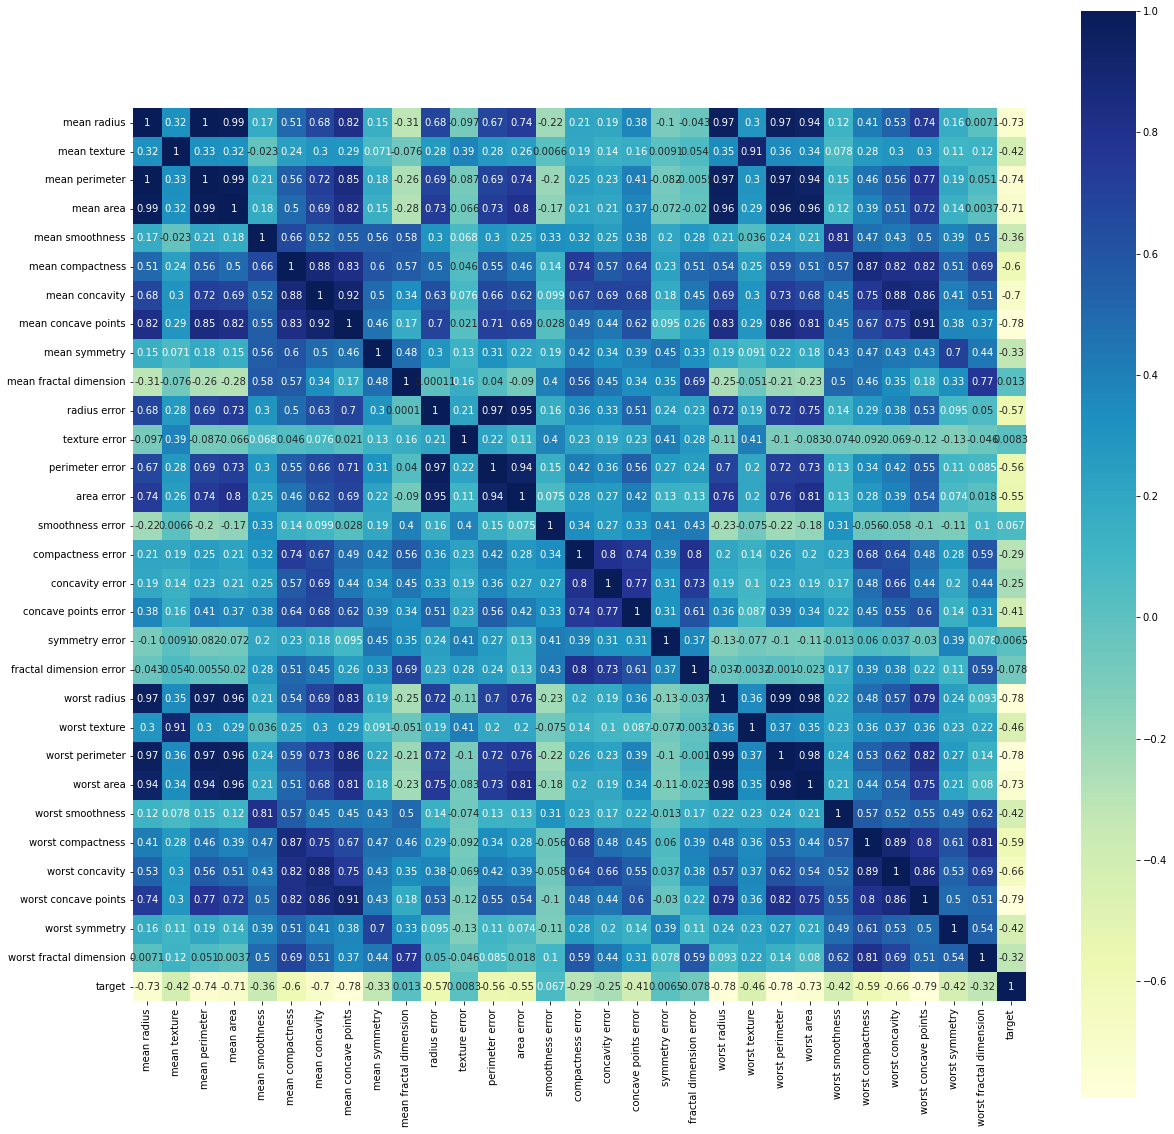

In [9]:
'''
As it can be observed from the visualisation below, certain features present high correlation with one another.
This information will be used to remove redundant features from the dataset at the Data Cleaning stage, 
before model training. By doing so, this reduces the risk of overfitting the models to the data.
'''

# Visualise correlation between features
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, annot=True, square= True, cmap='YlGnBu')
plt.show()

### Visualising the Data

In the visualisations below, we can observe the target feature which refers to diagnosis as Malign (1) or Benign (0). The feature is slightly unbalanced, with 62.7% of records falling under the classification class Malign.<br>
There are no typos or errors presented on the values in this feature required to be clean. The feature presents no missing values.

In [10]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha='center', c='white')

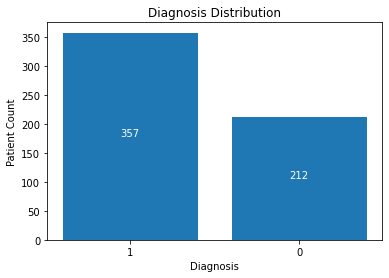

In [11]:
# Visualise the Target variable Diagnosis (1 for Malign Tumors and 0 for Benign Tumors)
target_counts = df['target'].value_counts()

plt.bar(target_counts.index.astype(str), target_counts.values)
addlabels(target_counts.index.astype(str), target_counts.values)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Patient Count')
plt.show()

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>],
       [<AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>],
       [<AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>],
       [<AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:

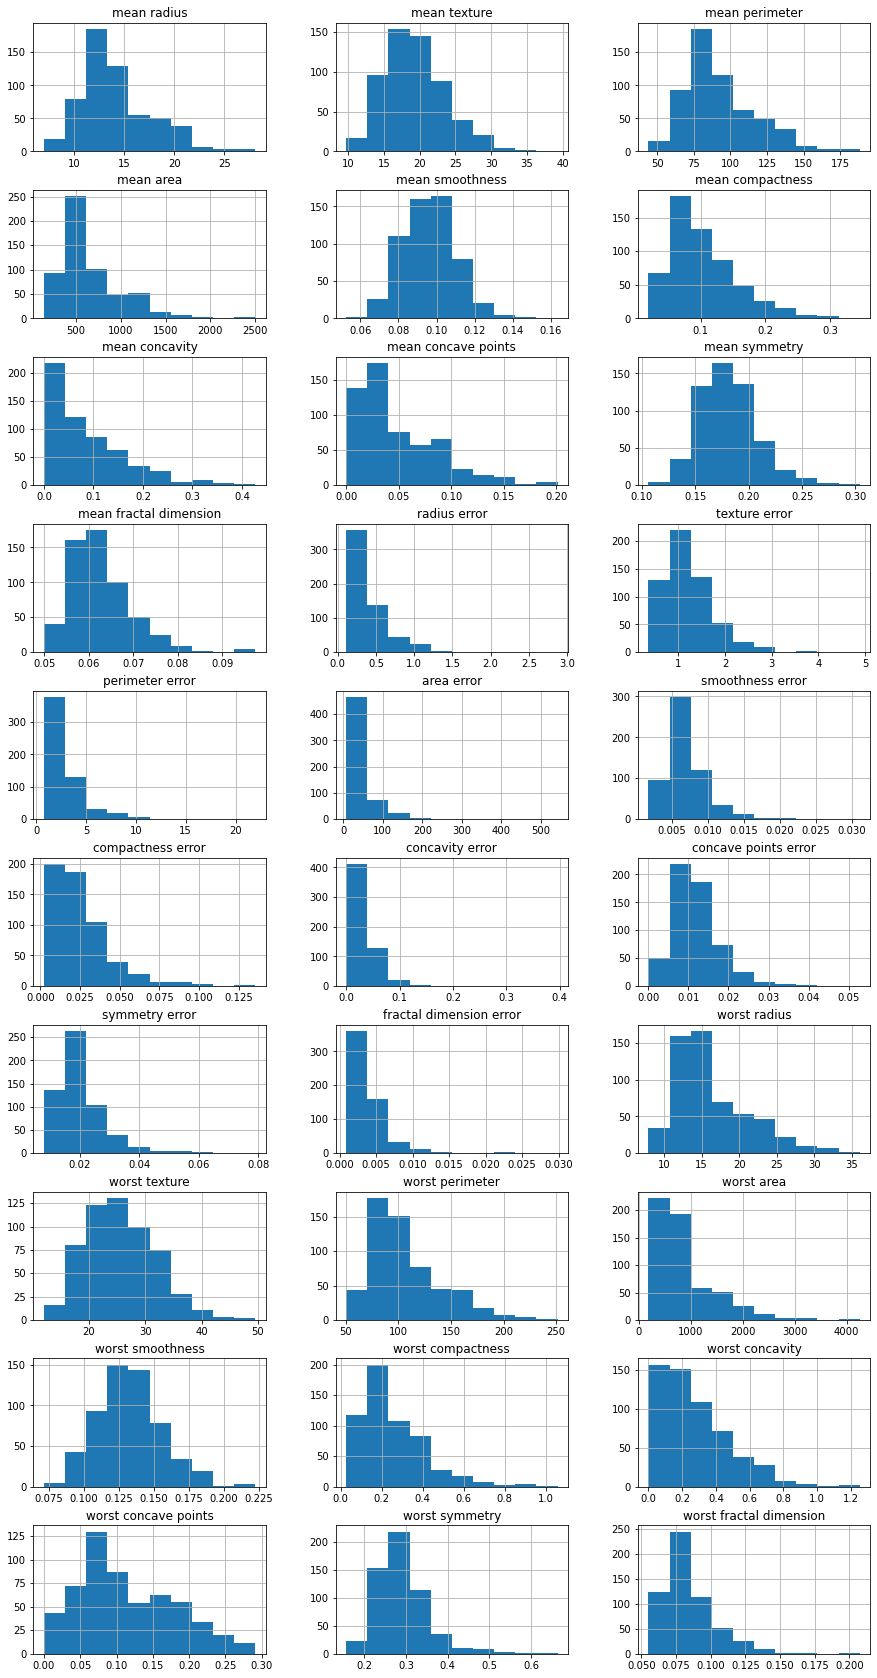

In [12]:
fig, axis = plt.subplots(10,3, figsize=(15,30))
df.drop('target',axis=1).hist(ax=axis)

## Data Preparation

### Data Cleanse and Split (Train, Validate, Test)

For the Data Cleaning step, removal of features that presented correlation of 0.8 or above were removed from the dataset, as those presented redundant information as it was already being captured in another feature. By doing so, this reduces the risk of the models overfitting to the existing data and performing badly in unseen data. <br>
This was reflected in the model through the removal of features involving perimeter and area, as those presented high correlation with radius, as the 3 measures refer to the size of the tumor. Removal of the 'worst' features, as those presented high correlation with the 'mean' features. And removal of features involving compactness or concavity as those presented high correlation between each.<br>
Upon removal of the mentioned features, no feature presented correlation equal or above 0.8 with each other.

In [13]:
def DataCleaning(df):
    # Remove features that present high correlation
    cols = ['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error',
            'compactness error','concavity error', 'concave points error', 'worst radius', 'worst texture',
            'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 
            'worst concave points', 'worst symmetry', 'worst fractal dimension']
    df = df.drop(cols,axis=1)
    
    return df

In [14]:
# Apply general data cleaning function
df = DataCleaning(df)

# Separate the target column from the rest of the dataset
target_column = 'target'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training (70%) and test (30%) sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)
# And a further split of training set into training and validation sets (80% training, 20% validation)
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, 
                                                                                            test_size=0.2, random_state=42)

print("Training Set number of rows: ",len(train_data))
print("Validation Set number of rows: ",len(validation_data))
print("Test Set number of rows: ",len(test_data))

Training Set number of rows:  318
Validation Set number of rows:  80
Test Set number of rows:  171


## Modelling

In this section, using Grid Search, four different types of Classification models are evaluated - Random Forest, Logistic Regression, Neural Networks and Support Vector Machine, being fitted with the Train dataset and have its accuracy compared when predicting on Validation dataset.<br>
All the four models presented high accuracy, with Logistic Regression being the model with best performance, with an accuracy rate of 90% for the Validation dataset.

### Random Forest

In [17]:
rf_hyperparameters = {'n_estimators': [25, 50, 100, 150], 
              'max_features': ['sqrt', 'log2', None], 
              'max_depth': [3, 6, 9], 
              'max_leaf_nodes': [3, 6, 9], } 

rf_grid = GridSearchCV(RandomForestClassifier(), rf_hyperparameters, refit=True, verbose=1)
rf_grid.fit(train_data, train_labels)

print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}
RandomForestClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=50)


In [18]:
rf_grid_predictions = rf_grid.predict(validation_data)
rf_grid_accuracy = accuracy_score(validation_labels, rf_grid_predictions)
print('Accuracy: ', rf_grid_accuracy)

Accuracy:  0.8375


### Logistic Regression

In [19]:
lr_hyperparameters = [{'penalty':['l1','l2','none'],
                       'C' : np.logspace(-4,4,20),
                       'solver': ['lbfgs','newton-cg','liblinear']}]

lr_grid = GridSearchCV(LogisticRegression(), lr_hyperparameters, refit=True, verbose=1)
lr_grid.fit(train_data, train_labels)

print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=206.913808111479, penalty='l1', solver='liblinear')


In [20]:
lr_grid_predictions = lr_grid.predict(validation_data)
lr_grid_accuracy = accuracy_score(validation_labels, lr_grid_predictions)
print('Accuracy: ', lr_grid_accuracy)

Accuracy:  0.9


### Multi-Layer Perceptron (MLP) - Neural Networks

In [21]:
nn_hyperparameters = {'hidden_layer_sizes': [(50, 50), (100, 50)],
                      'activation': ['relu', 'tanh'],
                      'solver': ['adam', 'lbfgs'],
                      'learning_rate': ['constant', 'invscaling'],
                      'alpha': [0.0001, 0.001, 0.01],
                      'batch_size': ['auto', 32, 64]}

nn_grid = GridSearchCV(MLPClassifier(), nn_hyperparameters, refit=True, verbose=1)
nn_grid.fit(train_data, train_labels)

print(nn_grid.best_params_)
print(nn_grid.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
MLPClassifier(alpha=0.001, batch_size=32, hidden_layer_sizes=(50, 50),
              learning_rate='invscaling', solver='lbfgs')


In [22]:
nn_grid_predictions = nn_grid.predict(validation_data)
nn_grid_accuracy = accuracy_score(validation_labels, nn_grid_predictions)
print('Accuracy: ', nn_grid_accuracy)

Accuracy:  0.8625


### Support Vector Machine (SVM)

In [23]:
svm_hyperparameters = {'C':[0.001,0.01,0.1,1,10],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['linear', 'rbf']}

# Apply Grid Search
svm_grid = GridSearchCV(svm.SVC(), svm_hyperparameters, refit=True, verbose=1)
svm_grid.fit(train_data, train_labels)

print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [24]:
svm_grid_predictions = svm_grid.predict(validation_data)
svm_grid_accuracy = accuracy_score(validation_labels, svm_grid_predictions)
print('Accuracy: ', svm_grid_accuracy)

Accuracy:  0.875


## Evaluation

The test dataset was only introduced to the model at this stage after model selection, having no influence on previous steps taken during modelling process. The model selected for this task was Logistic Regression with hyperparameters configuration as {'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}.

In [25]:
lr_grid_final_predictions = lr_grid.predict(test_data)
lr_grid_final_accuracy = accuracy_score(test_labels, lr_grid_final_predictions)

print('Accuracy: ', lr_grid_final_accuracy)

Accuracy:  0.9590643274853801


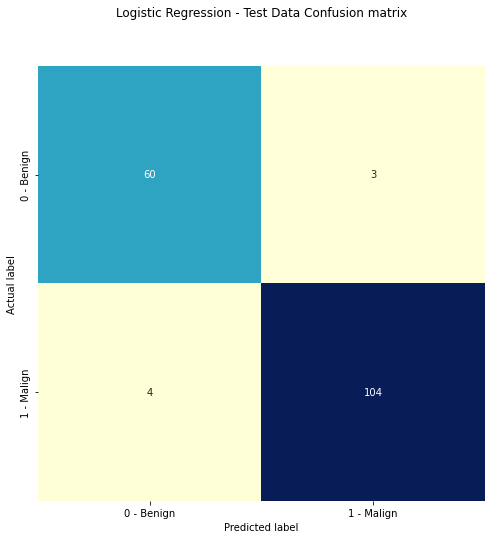

In [34]:
# Create confusion matrix
lr_predictions_matrix = confusion_matrix(test_labels,lr_grid_final_predictions)

class_names = ['0 - Benign', '1 - Malign']
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(pd.DataFrame(lr_predictions_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax,
                xticklabels=class_names, yticklabels=class_names, cbar=False)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.title('Logistic Regression - Test Data Confusion matrix', y=1.1)

plt.show()

In [35]:
# Calculate model quality metrics including Accuracy, Precision, Recall and F1 Score
print(classification_report(test_labels, lr_grid_final_predictions, target_names=class_names))

              precision    recall  f1-score   support

  0 - Benign       0.94      0.95      0.94        63
  1 - Malign       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [36]:
# False Negative Rate
def calculate_fnr(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix.ravel()
    fnr = FN / (FN + TP)
    return fnr

In [37]:
lr_fnr = calculate_fnr(lr_predictions_matrix)
print(f'False Negative Rate: {lr_fnr*100:.1f}%')

False Negative Rate: 3.7%
